In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [18]:
img0 = cv2.imread('../opencv-np-workshop/data/img/nemo.jpg', cv2.IMREAD_GRAYSCALE)
img1 = cv2.imread('../opencv-np-workshop/data/img/nemo-sea.jpg', cv2.IMREAD_GRAYSCALE)

In [19]:
img0.shape

(341, 520)

In [20]:
img1.shape

(842, 750)

### 1. Create the detector, detect keypoints and compute descriptors

In [33]:
detector = cv2.ORB_create(100)
kps0, fea0 = detector.detectAndCompute(img0, None)
kps1, fea1 = detector.detectAndCompute(img1, None)

### 2. Use a descriptor matcher, to find matching features from left to right and viceversa.

In addition, we will use `knnMatch` method to find the difference between "first-best" match and "second-best" match.

In [34]:
matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING, False)
matches01 = matcher.knnMatch(fea0, fea1, k=2)
matches10 = matcher.knnMatch(fea1, fea0, k=2)

In [35]:
matches01[0][0].distance #distance between descriptors (first match). LOWER IS BETTER

61.0

In [36]:
matches01[0][1].distance #distance between descriptors (second match)

86.0

### 3. Check if the first match is much better than the second

In [38]:
def ratio_test(matches, ratio_thr):
    good_matches = []
    for m in matches:
        ratio = m[0].distance / m[1].distance
        if ratio < ratio_thr:
            good_matches.append(m[0])
    return good_matches

RATIO_THR = 0.7  # Lower values mean more aggressive filtering.
good_matches01 = ratio_test(matches01, RATIO_THR)
good_matches10 = ratio_test(matches10, RATIO_THR)

### 4. Keep only matches in both directions

In [39]:
good_matches10_ = {(m.trainIdx, m.queryIdx) for m in good_matches10}
final_matches = [m for m in good_matches01 if (m.queryIdx, m.trainIdx) in good_matches10_]

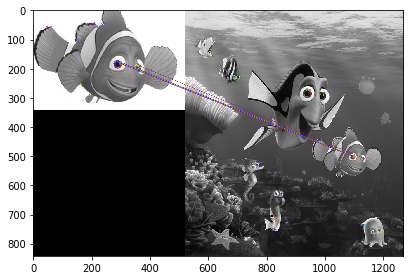

In [40]:
dbg_img = cv2.drawMatches(img0, kps0, img1, kps1, final_matches, None)
plt.figure()
plt.imshow(dbg_img[:,:,[2,1,0]])
plt.tight_layout()
plt.show()